In [1]:
import numpy as np
import os
import cv2 as cv
import matplotlib.pyplot as plt
import math
from scipy.stats import linregress
import pickle
import matplotlib.patches as mpatches

In [2]:
for old_image_name in [x for x in os.listdir(os.curdir) if ".JPG" in x]:
    print old_image_name
    if "_" in old_image_name:
        new_image_name = old_image_name.split("_")[1]
        os.rename(old_image_name, new_image_name)

0022-1by13sec-100ISO.JPG
0023-1by10sec-100ISO.JPG
0012-1by125sec-100ISO.JPG
0019-1by25sec-100ISO.JPG
0011-1by160sec-100ISO.JPG
0020-1by20sec-100ISO.JPG
0024-1by8sec-100ISO.JPG
0008-1by320sec-100ISO.JPG
0004-1by800sec-100ISO.JPG
0017-1by40sec-100ISO.JPG
0009-1by250sec-100ISO.JPG
0016-1by50sec-100ISO.JPG
0010-1by200sec-100ISO.JPG
0014-1by80sec-100ISO.JPG
0007-1by400sec-100ISO.JPG
0021-1by15sec-100ISO.JPG
0018-1by30sec-100ISO.JPG
0006-1by500sec-100ISO.JPG
0013-1by100sec-100ISO.JPG
0005-1by640sec-100ISO.JPG
0003-1by1000sec-100ISO.JPG
0015-1by60sec-100ISO.JPG


In [3]:
images = [x for x in os.listdir(os.curdir) if ".JPG" in x]
images.sort()

In [4]:
exposure_times = [1./20, 1./25,1./30,1./40,1./50,1./60,1./80,1./100,1./125,1./160,1./200,1./250,1./320,1./400, 1./500, 1./640, 1./800, 1./1000]
# Omitted values, oversaturated
# 1./8, 1./10, 1./13, 1./15, 
list.reverse(exposure_times)

In [5]:
img_exposure_pairs = zip(images,exposure_times)

In [7]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    handle, = plt.plot(x_vals, y_vals, '--', label="Linear Regression")
    plt.legend(handles=[handle])
    

In [8]:
mean_Bs = []
mean_Gs = []
mean_Rs = []
for img_path, exposure in img_exposure_pairs:   
    img = cv.imread(img_path)
    x,y,_ = img.shape
    mid_x = x/2
    mid_y = y/2
    crop_factor = 10
    low_x, hi_x = mid_x-crop_factor, mid_x+crop_factor
    low_y, hi_y = mid_y-crop_factor, mid_y+crop_factor
#     RGB_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    cropped_img = img[low_x:hi_x,low_y:hi_y]
    mean, std = cv.meanStdDev(cropped_img)
    mean_Bs.append(mean[0][0])
    mean_Gs.append(mean[1][0])
    mean_Rs.append(mean[2][0])
    #plt.imshow(RGB_img)
    #hist = cv.calcHist([cropped_img],[0],None,[256],[0,256])
    #plt.title("Exposure time: {0} second(s), Mean pixel value: {1}".format(exposure,mean))
    #plt.show()
    #plt.plot(hist)
    #plt.show()

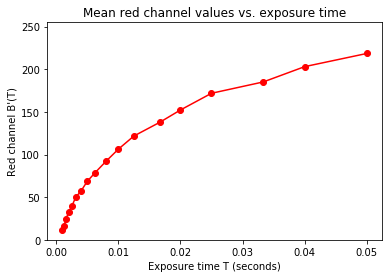

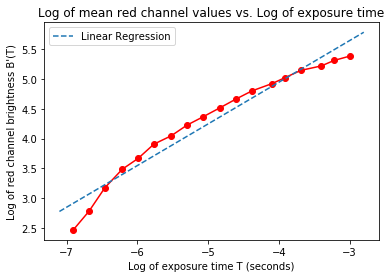

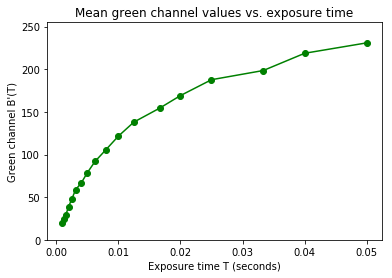

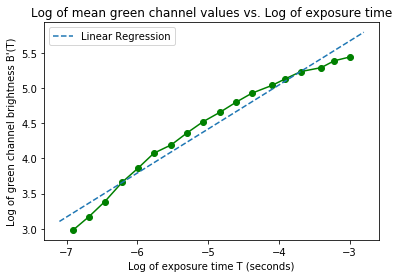

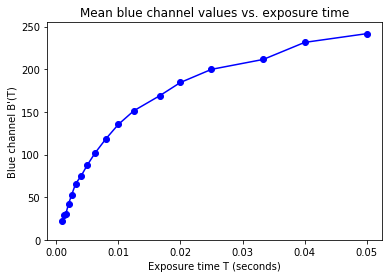

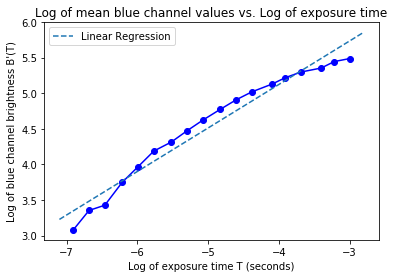

In [21]:
plt.plot(exposure_times, mean_Rs, color="red", marker="o")
plt.ylim(0, 255)
plt.title("Mean red channel values vs. exposure time")
plt.xlabel("Exposure time T (seconds)")
plt.ylabel("Red channel B'(T)")
plt.savefig("Red channel B(T).JPG", dpi=200)
plt.show()

plt.plot(np.log(exposure_times), np.log(mean_Rs), color="red", marker="o")
linearized_R = linregress(np.log(exposure_times), np.log(mean_Rs))
abline(linearized_R.slope, linearized_R.intercept)
plt.title("Log of mean red channel values vs. Log of exposure time")
plt.xlabel("Log of exposure time T (seconds)")
plt.ylabel("Log of red channel brightness B'(T)")
plt.savefig("Log of red channel B(T).JPG", dpi=200)
plt.show()

plt.plot(exposure_times, mean_Gs, color="green", marker="o")
plt.title("Mean green channel values vs. exposure time")
plt.xlabel("Exposure time T (seconds)")
plt.ylabel("Green channel B'(T)")
plt.ylim(0, 255)
plt.savefig("Green channel B(T).JPG", dpi=200)
plt.show()

plt.plot(np.log(exposure_times), np.log(mean_Gs), color="green", marker="o")
linearized_G = linregress(np.log(exposure_times), np.log(mean_Gs))
abline(linearized_G.slope, linearized_G.intercept)
plt.title("Log of mean green channel values vs. Log of exposure time")
plt.xlabel("Log of exposure time T (seconds)")
plt.ylabel("Log of green channel brightness B'(T)")
plt.savefig("Log of green channel B(T).JPG", dpi=200)
plt.show()

plt.plot(exposure_times, mean_Bs, color="blue", marker="o")
plt.title("Mean blue channel values vs. exposure time")
plt.xlabel("Exposure time T (seconds)")
plt.ylabel("Blue channel B'(T)")
plt.ylim(0, 255)
plt.savefig("Blue channel B(T).JPG", dpi=200)
plt.show()

plt.plot(np.log(exposure_times), np.log(mean_Bs), color="blue", marker="o")
linearized_B = linregress(np.log(exposure_times), np.log(mean_Bs))
abline(linearized_B.slope, linearized_B.intercept)
plt.title("Log of mean blue channel values vs. Log of exposure time")
plt.xlabel("Log of exposure time T (seconds)")
plt.ylabel("Log of blue channel brightness B'(T)")
plt.savefig("Log of blue channel B(T).JPG", dpi=200)
plt.show()

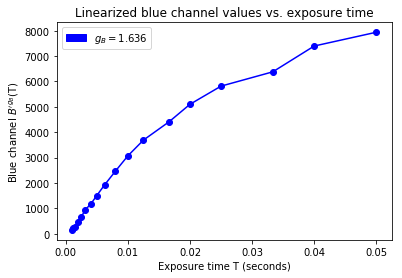

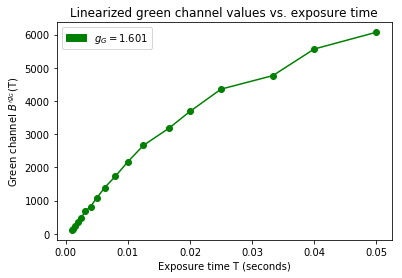

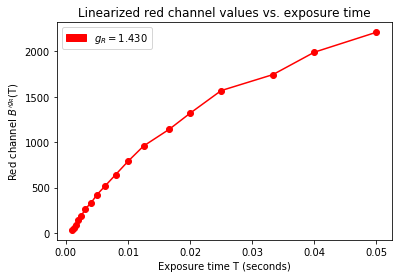

In [22]:
linearized_B = linregress(np.log(exposure_times), np.log(mean_Bs))
B_g_value = 1/linearized_B.slope
modified_mean_Bs = [math.pow(x, (B_g_value)) for x in mean_Bs]
plt.plot(exposure_times, modified_mean_Bs, color="blue", marker="o")
b_g_legend = mpatches.Patch(color='blue', label='$g_B = {0:.3f}$'.format(B_g_value))
plt.legend(handles=[b_g_legend])
plt.title("Linearized blue channel values vs. exposure time")
plt.xlabel("Exposure time T (seconds)")
plt.ylabel("Blue channel $B'^{g_B}$(T)")
plt.savefig("Blue channel Bg(T).JPG", dpi=200)
plt.show()

linearized_G = linregress(np.log(exposure_times), np.log(mean_Gs))
G_g_value = 1/linearized_G.slope
modified_mean_Gs = [math.pow(x, (G_g_value)) for x in mean_Gs]
plt.plot(exposure_times, modified_mean_Gs, color="green", marker="o")
g_g_legend = mpatches.Patch(color='green', label='$g_G = {0:.3f}$'.format(G_g_value))
plt.legend(handles=[g_g_legend])
plt.title("Linearized green channel values vs. exposure time")
plt.xlabel("Exposure time T (seconds)")
plt.ylabel("Green channel $B'^{g_G}$(T)")
plt.savefig("Green channel Bg(T).JPG", dpi=200)
plt.show()

linearized_R = linregress(np.log(exposure_times), np.log(mean_Rs))
R_g_value = 1/linearized_R.slope
modified_mean_Rs = [math.pow(x, (R_g_value)) for x in mean_Rs]
plt.plot(exposure_times, modified_mean_Rs, color="red", marker="o")
r_g_legend = mpatches.Patch(color='red', label='$g_R = {0:.3f}$'.format(R_g_value))
plt.legend(handles=[r_g_legend])
plt.title("Linearized red channel values vs. exposure time")
plt.xlabel("Exposure time T (seconds)")
plt.ylabel("Red channel $B'^{g_R}$(T)")
plt.savefig("Red channel Bg(T).JPG", dpi=200)
plt.show()

In [20]:
for file_path, linearized_func in zip(["linearized_{0}.pickle".format(x) for x in ["R", "G", "B"]], [linearized_R, linearized_G, linearized_B]):
    with open(file_path, "w") as file:
        pickle.dump(linearized_func, file)